In [24]:
import json, os
import pandas as pd
import numpy as np

path = '/Volumes/Lukas_Gehrke/fastReach/data/eeglab2python'
pIDs = [12, 14, 15, 16, 17, 19, 20, 21, 22, 23]

In [25]:
nr_chans = []
f1 = []
threshold = []
acc = []
acc_std = []
fprs = pd.DataFrame()
recalls = pd.DataFrame()

for pID in pIDs:
    this_pID = 'sub-' + "%03d" % (pID)

    print(this_pID)
    params = json.load(open(path+os.sep+this_pID+os.sep+'bci_params.json'))
    fpr = pd.read_csv(path+os.sep+this_pID+os.sep+'fpr.csv', header=None)
    # print(fpr)
    recall = pd.read_csv(path+os.sep+this_pID+os.sep+'recall.csv', header=None)

    fprs = pd.concat([fprs, fpr], axis=1).reset_index(drop=True)
    recalls = pd.concat([recalls, recall], axis=1).reset_index(drop=True)
    
    nr_chans.append(params['nr_chans'])
    f1.append(params['f1'])
    threshold.append(params['threshold'])
    acc.append(params['acc'])
    acc_std.append(params['acc_std'])

sub-012
sub-014
sub-015
sub-016
sub-017
sub-019
sub-020
sub-021
sub-022
sub-023


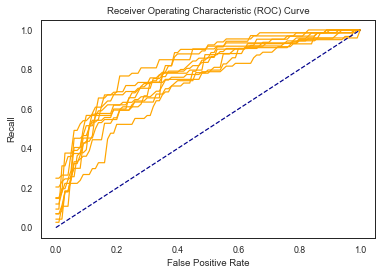

In [26]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    # plt.legend()
    plt.show()

plot_roc_curve(fprs, recalls)

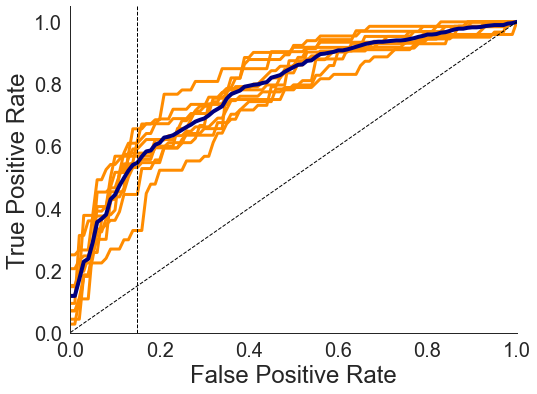

In [27]:
import seaborn as sns

# seaborn paper style
sns.set_context("paper")

# Set the style for Seaborn
# sns.set_style("darkgrid")
sns.set_style("white")

# Create the ROC curve plot
plt.figure(figsize=(8, 6))

plt.plot(fprs, recalls, color='darkorange', lw=3)
# add means of fprs and recalls
plt.plot(fprs.mean(axis=1), recalls.mean(axis=1), color='navy', lw=4, linestyle='-')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.plot([0.15, .15], [0, 1.05], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")

sns.despine()
plt.show()


In [28]:
# rename columns of fprs and recalls to subject IDs that are increasing from 0
fprs.columns = np.arange(0, len(fprs.columns))
recalls.columns = np.arange(0, len(recalls.columns))

# wide to long format fprs and recalls and add column for subject IDs
fprs_long = pd.melt(fprs.reset_index(), id_vars=['index'], value_vars=fprs.columns)
recalls_long = pd.melt(recalls.reset_index(), id_vars=['index'], value_vars=recalls.columns)

# merge fprs and recalls
roc = pd.merge(fprs_long, recalls_long, on=['index', 'variable'])

/var/folders/04/2q4w_vgn0_7dtkxyll6j2gx40000gn/T/ipykernel_25880/3213769977.py:11: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data = roc, x = 'value_x', y = 'value_y', hue = 'variable', palette = sns.color_palette(['black']), linewidth = 2, alpha = 0.2)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


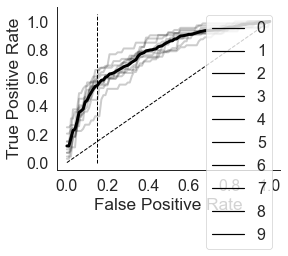

In [29]:

roc_agg = roc.groupby(['value_x']).mean().reset_index()

with sns.plotting_context('paper', font_scale = 1.8):

    ### Create new plot
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    fig.patch.set_alpha(1)

    sns.despine() #bottom=True, left=True
    
    ax = sns.lineplot(data = roc, x = 'value_x', y = 'value_y', hue = 'variable', palette = sns.color_palette(['black']), linewidth = 2, alpha = 0.2)
    ax = sns.lineplot(data = roc_agg, x = 'value_x', y = 'value_y', color = 'black', linewidth = 3)

    # add a solid diagonal line
    ax.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

    # add a vertical line at 0.15
    ax.plot([0.15, .15], [0, 1.05], color='black', lw=1, linestyle='--')
    
    # Label and show
    # label_plot_for_subcats(ax)
    # ax.set_title(title)
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

    # plt.show()
    fig.savefig('roc' +'.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)
    # fig.savefig('results/'+title + '_' +'.png', format='png', transparent=True, bbox_inches='tight', dpi=300)

In [30]:
nr_chans = []
chan_ids = []

for pID in pIDs:
    this_pID = 'sub-' + "%03d" % (pID)
    params = json.load(open(path+os.sep+this_pID+os.sep+'bci_params.json'))    
    
    nr_chans.append(params['nr_chans'])
    chan_ids.append(params['chans'])



In [31]:
# list from list of lists chan_ids
chan_ids = [item for sublist in chan_ids for item in sublist]
# create dataframe from chan_ids
chan_ids = pd.DataFrame(chan_ids)
# select index where count unique values in chan_ids > 2
s = chan_ids[0].value_counts() > 3

In [33]:
# load chan names
chan_names = pd.read_csv('/Volumes/Lukas_Gehrke/fastReach/data/eeglab2python/sub-012/sel_chans_names.csv')
freq_sel_chans = [7, 23, 24, 4, 33]
chan_names = chan_names.iloc[freq_sel_chans]

print(chan_names)

   Var1
7    C3
23   Cz
24   C4
4   FT9
33  AF3
